### Análisis Exploratorio de los Datos (EDA)

In [274]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [275]:
df = pd.read_csv('clean_data.csv')
df.head(5)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,...,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank,year
0,0,1991-339,Adelaide,Hard,32,A,1990-12-31,1,101723,Magnus Larsson,...,95.0,62.0,44.0,23.0,16.0,6.0,8.0,56.0,2.0,1990
1,1,1991-339,Adelaide,Hard,32,A,1990-12-31,2,100946,Slobodan Zivojinovic,...,84.0,41.0,35.0,27.0,15.0,1.0,2.0,304.0,75.0,1990
2,2,1991-339,Adelaide,Hard,32,A,1990-12-31,3,101234,Patrik Kuhnen,...,60.0,37.0,22.0,6.0,8.0,4.0,8.0,82.0,69.0,1990
3,3,1991-339,Adelaide,Hard,32,A,1990-12-31,4,101889,Todd Woodbridge,...,74.0,45.0,30.0,11.0,10.0,5.0,8.0,50.0,84.0,1990
4,4,1991-339,Adelaide,Hard,32,A,1990-12-31,5,101274,Udo Riglewski,...,77.0,41.0,28.0,15.0,11.0,4.0,8.0,88.0,28.0,1990


In [276]:
df.shape

(94344, 45)

Vemos que el dataset limpio tiene 94.344 filas y 44 columnas. 

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94344 entries, 0 to 94343
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     94344 non-null  int64  
 1   tourney_id     94344 non-null  object 
 2   tourney_name   94344 non-null  object 
 3   surface        94344 non-null  object 
 4   draw_size      94344 non-null  int64  
 5   tourney_level  94344 non-null  object 
 6   tourney_date   94344 non-null  object 
 7   match_num      94344 non-null  int64  
 8   winner_id      94344 non-null  int64  
 9   winner_name    94344 non-null  object 
 10  winner_hand    94344 non-null  object 
 11  winner_ht      94344 non-null  float64
 12  winner_ioc     94344 non-null  object 
 13  winner_age     94344 non-null  float64
 14  loser_id       94344 non-null  int64  
 15  loser_name     94344 non-null  object 
 16  loser_hand     94344 non-null  object 
 17  loser_ht       94344 non-null  float64
 18  loser_

Las columnas son las siguientes:
1. 'Unnamed: 0': no aporta valor. Se eliminará.
2. 'tourney_id': un identificador para cada torneo. Los primeros números corresponden al año en que se jugó y el resto son aleatorios. Por ejemplo: 1985-301.
3.	'tourney_name': el nombre del torneo.
4.	'surface': la superficie en la que se jugó el torneo, que puede ser Hard = pista rápida, Clay = tierra batida, Grass = Hierba o Carpet = moqueta.
5.	'draw_size': nombre de jugadores en el sorteo.
6.	'tourney_level': el nivel del torneo, que puede ser uno de los siguientes: G= Gran Slam, M = Masters 1000, A = otros torneos, F = Finales del circuito y otros torneos de final de temporada o D = Copa Davis.
7.	'Year': año del torneo.
8.	'match_num': identificador único para cada partido. 
9.	'winner_id': identificador del ganador.
10.	'winner_name': nombre del ganador.
11.	'winner_hand': si el ganador es diestro, zurdo, ambidiestro o no se sabe.
12.	'winner_ht': altura del ganador, en centímetros.
13.	'winner_ioc': país de origen del ganador.
14.	'winner_age': edad del ganador.
15.	'loser_id': identificador único del perdedor.
16.	'loser _name': nombre del perdedor.
17.	'loser _hand': si el perdedor es diestro, zurdo, ambidiestro o no se sabe.
18.	'loser _ht': altura del perdedor, en centímetros.
19.	'loser _ioc': país de origen del perdedor
20.	'loser _age': edad del perdedor.
21.	'score': resultado del partido. Se eliminará, ya que el objetivo es que el modelo prediga qué jugador ganará el partido.
22.	'best_of': indica si se ha jugado al mejor de 3 o 5 sets.
23.	'round': ronda de la competición. 
24.	'minutes': duración del partido.
25.	'w_ace': servicios directos del ganador.
26.	'w_df': dobles faltas del ganador.
27.	'w_svpt': puntos de servicio del ganador.
28.	'w_1stIn': primeros servicios del ganador.
29.	'w_1stWon': puntos ganados por el ganador con en el primer servicio.
30.	'w_2ndWon': puntos ganados por el ganador con en el segundo servicio.
31.	'w_SvGms': juegos de servicios ganados por el ganador.
32.	'w_bpSaved': puntos de rotura (‘break points’) salvados por el ganador.
33.	'w_bpFaced': puntos de rotura (‘break points’) a los que se ha enfrentado el ganador.
34.	'l_ace': servicios directos del perdedor.
35.	'l_df': dobles faltas del perdedor.
36.	'l_svpt': puntos de servicio del perdedor.
37.	'l_1stIn': primeros servicios del perdedor.
38.	'l_1stWon': puntos ganados por el perdedor con en el primer servicio.
39.	'l_2ndWon': puntos ganados por el perdedor con en el segundo servicio.
40.	'l_SvGms': juegos de servicios ganados por el perdedor.
41.	'l_bpSaved': puntos de rotura (‘break points’) salvados por el perdedor.
42.	'l_bpFaced': puntos de rotura (‘break points’) a los que se ha enfrentado el perdedor.
43.	'winner_rank': clasificación ATP del ganador, antes del torneo. 
44.	'loser_rank': clasificación ATP del perdedor, antes del torneo.

Eliminamos la columna 'Unnamed: 0', ya que no aporta valor.


In [278]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [279]:
df.describe().round().astype('int')

,draw_size,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,best_of,minutes,...,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank,year
count,94344,94344,94344,94344,94344,94344,94344,94344,94344,94344,...,94344,94344,94344,94344,94344,94344,94344,94344,94344,94344
mean,58,80,106834,186,26,106764,185,26,3,104,...,81,48,32,15,12,5,9,64,99,2006
std,37,117,16026,7,4,15829,7,4,1,39,...,29,19,14,7,4,3,4,82,130,10
min,2,1,100284,163,16,100282,160,15,3,1,...,0,0,0,0,0,-6,0,1,1,1990
25%,32,13,102148,183,23,102153,180,23,3,76,...,59,34,22,10,9,2,6,18,36,1998
50%,32,27,103656,185,26,103566,185,26,3,98,...,76,45,30,14,11,4,8,44,68,2006
75%,64,92,104868,190,28,104898,190,29,3,125,...,97,58,40,19,15,7,11,83,111,2014
max,128,1701,211346,211,43,212044,211,44,5,1146,...,489,328,284,101,91,28,38,1890,2159,2023


Llama la atención que la variable 'l_bpSaved' tenga valores negativos. No es posible. Por tanto, siempre que el valor sea negativo sea reemplazado por un 0.

In [280]:
df['l_bpSaved'] = df['l_bpSaved'].clip(lower=0)
df.describe().round().astype('int')

,draw_size,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,best_of,minutes,...,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank,year
count,94344,94344,94344,94344,94344,94344,94344,94344,94344,94344,...,94344,94344,94344,94344,94344,94344,94344,94344,94344,94344
mean,58,80,106834,186,26,106764,185,26,3,104,...,81,48,32,15,12,5,9,64,99,2006
std,37,117,16026,7,4,15829,7,4,1,39,...,29,19,14,7,4,3,4,82,130,10
min,2,1,100284,163,16,100282,160,15,3,1,...,0,0,0,0,0,0,0,1,1,1990
25%,32,13,102148,183,23,102153,180,23,3,76,...,59,34,22,10,9,2,6,18,36,1998
50%,32,27,103656,185,26,103566,185,26,3,98,...,76,45,30,14,11,4,8,44,68,2006
75%,64,92,104868,190,28,104898,190,29,3,125,...,97,58,40,19,15,7,11,83,111,2014
max,128,1701,211346,211,43,212044,211,44,5,1146,...,489,328,284,101,91,28,38,1890,2159,2023


In [281]:
df.dtypes

tourney_id        object
tourney_name      object
surface           object
draw_size          int64
tourney_level     object
tourney_date      object
match_num          int64
winner_id          int64
winner_name       object
winner_hand       object
winner_ht        float64
winner_ioc        object
winner_age       float64
loser_id           int64
loser_name        object
loser_hand        object
loser_ht         float64
loser_ioc         object
loser_age        float64
score             object
best_of            int64
round             object
minutes          float64
w_ace            float64
w_df             float64
w_svpt           float64
w_1stIn          float64
w_1stWon         float64
w_2ndWon         float64
w_SvGms          float64
w_bpSaved        float64
w_bpFaced        float64
l_ace            float64
l_df             float64
l_svpt           float64
l_1stIn          float64
l_1stWon         float64
l_2ndWon         float64
l_SvGms          float64
l_bpSaved        float64


In [282]:
df['tourney_level'].unique()

array(['A', 'G', 'M', 'F', 'D'], dtype=object)

Tal y como hemos indicado anteriormente, los distintos niveles de torneo son: 'A' = otros torneos, 'G' = Gran Slam, 'M' = Masters 1000, 'F' = Finales del circuito y otros torneos de final de temporada, y 'D' = Copa Davis.  

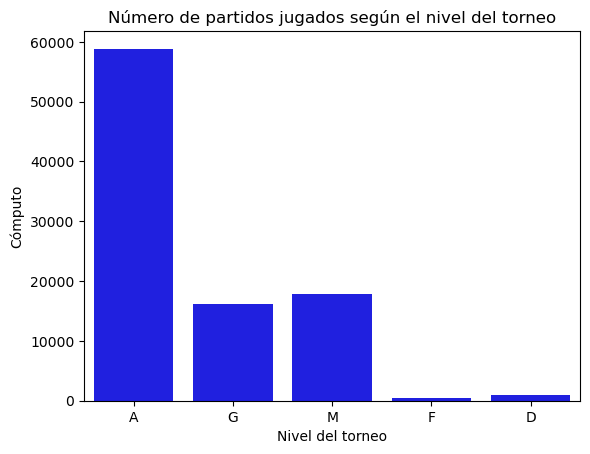

In [307]:
sns.countplot(data=df, x='tourney_level', color='blue')
plt.title('Número de partidos jugados según el nivel del torneo')
plt.xlabel('Nivel del torneo')
plt.ylabel('Cómputo')
plt.show()

Vemos que la categoría más frecuente es A (otros torneos), por mucha diferencia, seguida de M (Masters 1000) y G (Gran Slam). Tiene sentido teniendo en cuenta que los grandes torneos se disputan anualmente, mientras que el resto se celebran de manera más recurrente. Asimismo, las finales del circuito y otros torneos de final de temporada se celebran muy puntualmente.

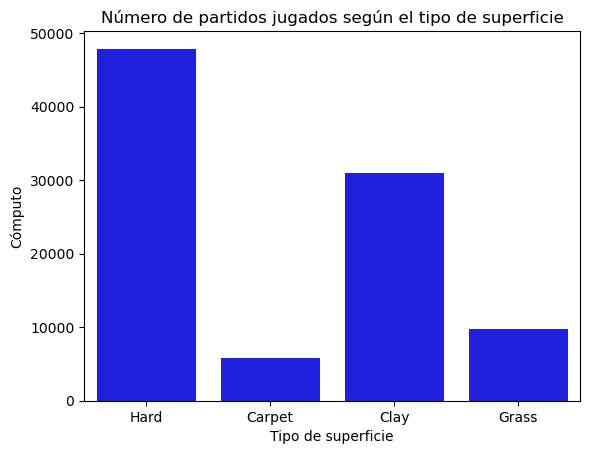

In [308]:
sns.countplot(data=df, x='surface', color='blue')
plt.title('Número de partidos jugados según el tipo de superficie')
plt.xlabel('Tipo de superficie')
plt.ylabel('Cómputo')
plt.show()

El tipo de superficie más común es 'Hard' (pista rápida), seguido de 'Clay' (tierra batida), y el menos común es 'carpet' (moqueta). Tiene sentido teniendo en cuenta que pocos clubs tienen pistas de hierba o moqueta y que de los torneos Gran Slam todos se juegan en pista rápida o tierra batida excepto Wimbledon, que se juega en hierba. 
En el siguiente gráfico vemos que solo algunos torneos de la categoria 'A', 'M', y 'F' se juegan en moqueta.

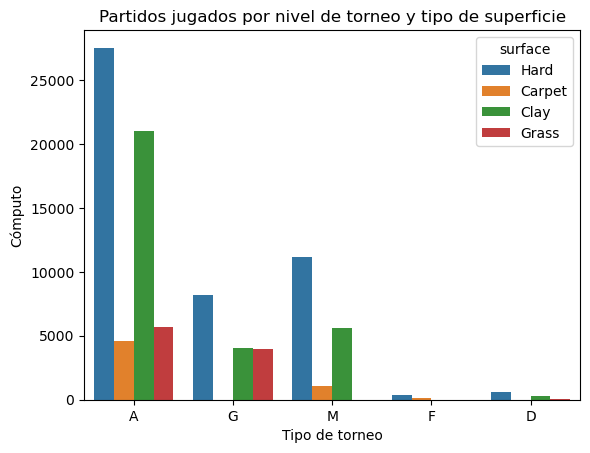

In [309]:
sns.countplot(data=df, x='tourney_level', hue='surface')
plt.title('Partidos jugados por nivel de torneo y tipo de superficie')
plt.xlabel('Tipo de torneo')
plt.ylabel('Cómputo')
plt.show()

A continuación, identificamos a los jugadores que más torneos han ganado por cada tipo de superficie. Para ello nos centramos en los que han ganado la ronda final (round == F).

NOTA: Dado que los datos son de los últimos 32 años aparecerán jugadores retirados (como Roger Federer) o que actualmente ya no están jugando al mismo nivel (como Rafael Nadal). Asimismo, no aparecerán nuevas promesas como Carlos Alcaraz ya que en su trayectoria profesional aún no ha tenido tiempo de acumular tantas victorias.

In [286]:
winners_surface = df[df['round'] == 'F'].groupby(['surface', 'winner_name'], as_index=False)['tourney_id'].count()
winners_surface

,surface,winner_name,tourney_id
0,Carpet,Alex Corretja,1
1,Carpet,Alexander Volkov,2
2,Carpet,Anders Jarryd,1
3,Carpet,Andre Agassi,4
4,Carpet,Andrei Cherkasov,1
...,...,...,...
628,Hard,Yahiya Doumbia,1
629,Hard,Yevgeny Kafelnikov,8
630,Hard,Yibing Wu,1
631,Hard,Yoshihito Nishioka,2


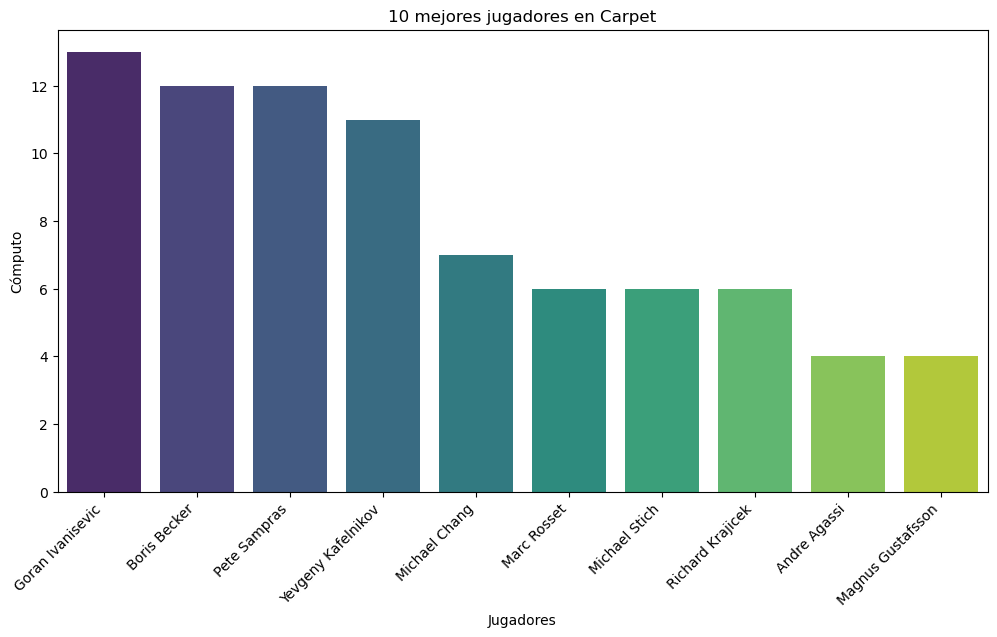

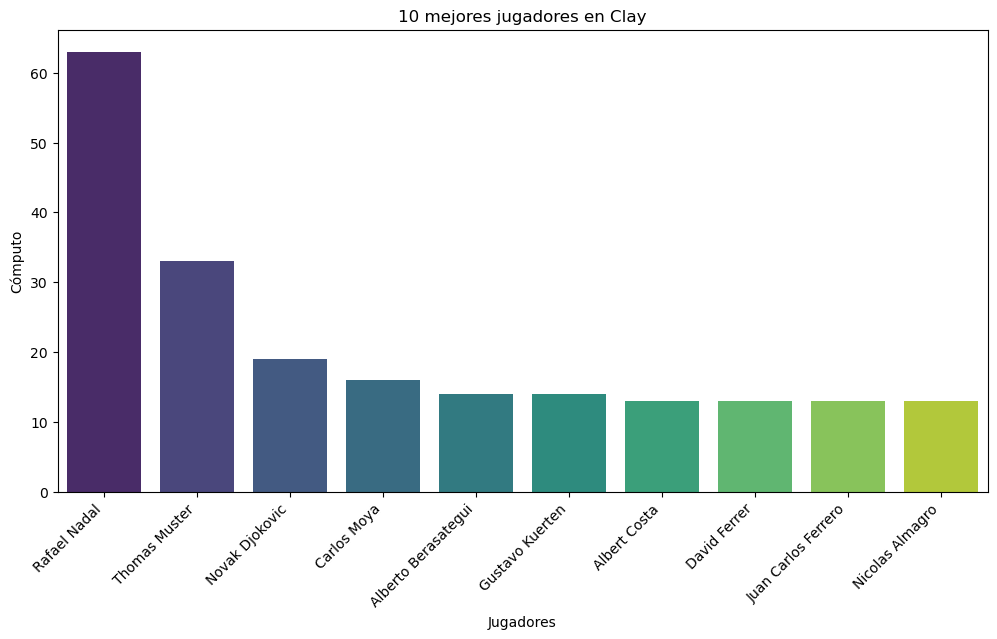

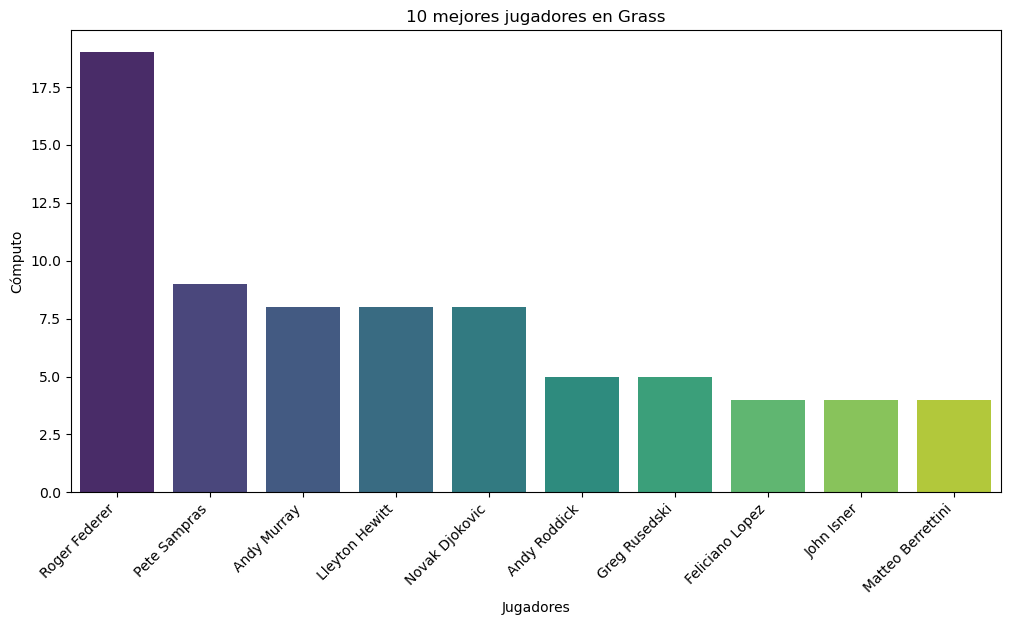

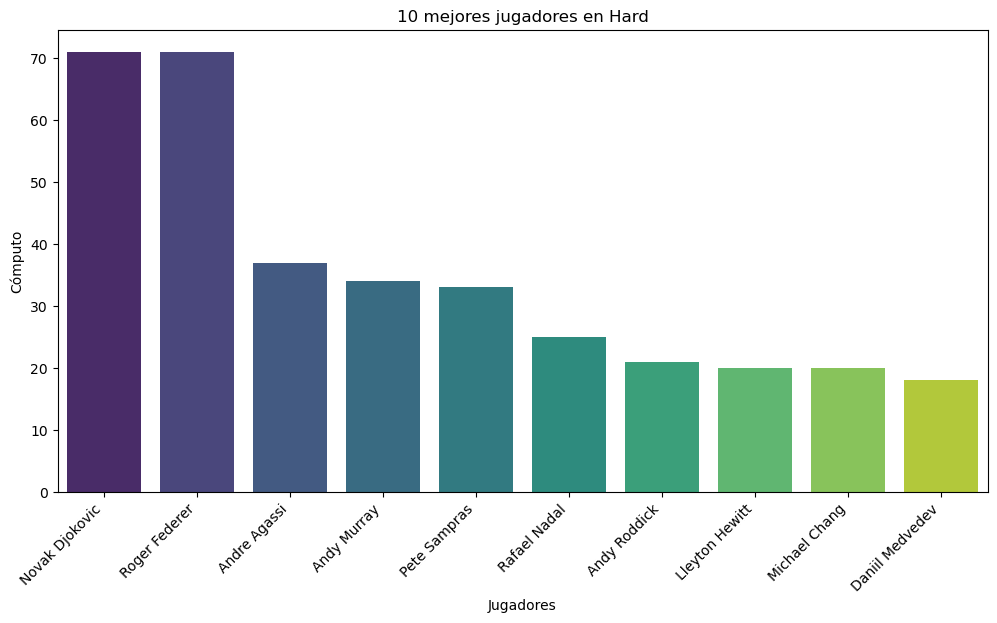

In [310]:
surface = winners_surface['surface'].unique()

for surface in surface:
    subset = winners_surface[winners_surface['surface'] == surface].nlargest(10, 'tourney_id')
    plt.figure(figsize=(12, 6))
    sns.barplot(data=subset, x='winner_name', y='tourney_id', palette='viridis')
    plt.title(f"10 mejores jugadores en {surface}")
    plt.xlabel('Jugadores')
    plt.ylabel('Cómputo')
    plt.xticks(rotation=45, ha='right')
    plt.show()

Vemos que las superficies favoritas de Roger Federer eran la hierba y la moqueta, ocupando en ambos la primera posición, en el segundo caso compartida con Novak Djokovic. En cuanto a la tierra batida, hay un claro ganador y este es Rafael Nadal, mientras que en pista rápida las primeras posiciones están más reñidas entre los jugadores Goran Ivanisevic, Boris Becker y Pete Sampras.

Si no tenemos en cuenta el tipo de superficie, los jugadores que acumulan más victorias son:

In [288]:
top_winners = df[df['round'] == 'F'].groupby(['winner_name'], as_index=False)['tourney_id'].count().sort_values(by='tourney_id', ascending=False).head(10)
top_winners

,winner_name,tourney_id
309,Roger Federer,103
269,Novak Djokovic,98
293,Rafael Nadal,92
285,Pete Sampras,57
34,Andy Murray,46
21,Andre Agassi,46
342,Thomas Muster,36
35,Andy Roddick,32
207,Lleyton Hewitt,30
244,Michael Chang,30


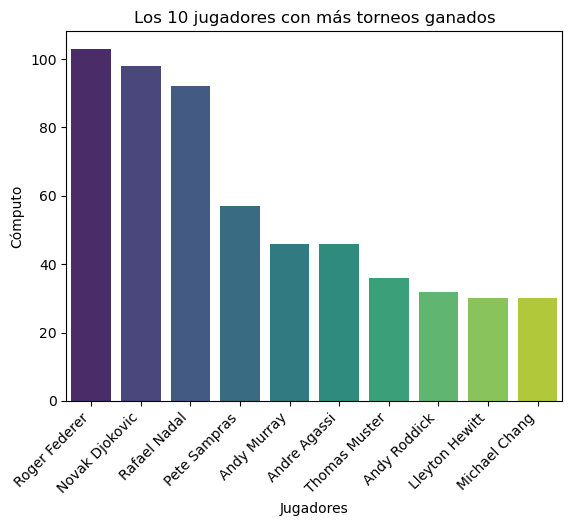

In [311]:
sns.barplot(data=top_winners, x='winner_name', y='tourney_id', palette='viridis')
plt.title('Los 10 jugadores con más torneos ganados')
plt.xlabel('Jugadores')
plt.ylabel('Cómputo')
plt.xticks(rotation=45, ha='right')
plt.show()

Las primeras posiciones están claramente disputadas entre las estrellas del tenis de los últimos años: Roger Federer, Novak Djokovic y Rafael Nadal. El primero ya retirado y el tercero con su carrera un poco en stand by.

Vemos ahora la evolución de los 5 mejores jugadores a lo largo de los últimos años:

In [299]:
top_5 = ['Roger Federer', 'Novak Djokovic', 'Rafael Nadal', 'Pete Sampras', 'Andy Murray']

top_5_evol = df[df['winner_name'].isin(top_5) & (df['round'] == 'F')]
top_5_evol['tourney_date'] = df['year']
result = top_5_evol.groupby(['winner_name', 'year'], as_index=False)['tourney_id'].count()
result.columns = ['winner_name', 'year', 'tournaments_won']
result

/var/folders/q_/v72nw5w576x1lnq29nqcs15r0000gn/T/ipykernel_5657/581389943.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,winner_name,year,tournaments_won
0,Andy Murray,2006,1
1,Andy Murray,2007,3
2,Andy Murray,2008,4
3,Andy Murray,2009,6
4,Andy Murray,2010,2
...,...,...,...
74,Roger Federer,2014,5
75,Roger Federer,2015,6
76,Roger Federer,2017,7
77,Roger Federer,2018,4


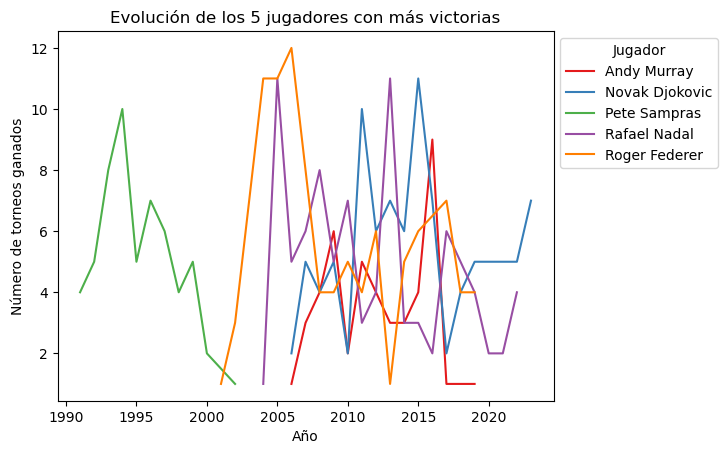

In [312]:
sns.lineplot(data=result, x='year', y='tournaments_won', hue='winner_name', markers=True, palette='Set1')
plt.title('Evolución de los 5 jugadores con más victorias')
plt.xlabel('Año')
plt.ylabel('Número de torneos ganados')
plt.legend(title='Jugador', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

El gráfico anterior muestra que entre los jugadores con más victorias acumuladas en los últimos años hay jugadores retirados desde hace mucho tiempo (como Pete Sampras, en 2002), o desde hace menos (como Federer, en 2022). También vemos jugadores a las puertas de retirarse como Rafael Nadal y Andy Murrray.

Vemos ahora las nacionalidades más comunes entre los jugadores que han ganado torneos. 

In [302]:
df['winner_ioc'].nunique()

91

In [303]:
top_nationalities = df[df['round'] == 'F'].groupby(['winner_ioc'], as_index=False)['winner_name'].nunique().sort_values(by='winner_name', ascending=False).head(10)
top_nationalities

,winner_ioc,winner_name
55,USA,44
20,ESP,40
0,ARG,31
22,FRA,29
25,GER,22
2,AUS,18
30,ITA,17
51,SWE,15
46,RUS,14
16,CZE,11


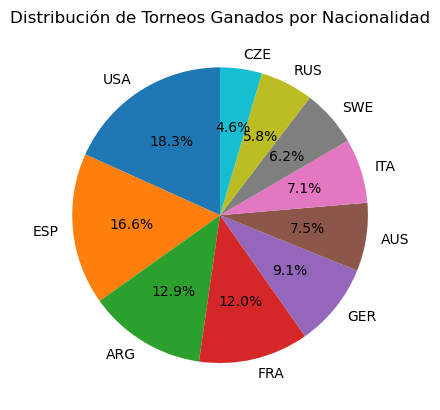

In [315]:
plt.pie(top_nationalities['winner_name'], labels=top_nationalities['winner_ioc'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Torneos Ganados por Nacionalidad')
plt.show()

Las nacionalidades más populares entre los jugadores que acumulan más victorias son: estadounidense, española y argentina, representando casi el 50%.